# Simulating a Pump Rejection Filter using MZIs
Term Paper for MIT 6.S976: Silicon Photonics (Fall 2022). By Shoumik Chowdhury (@shoumikdc)

In [266]:
""" Import Relevant Packages """
import numpy as np
import matplotlib.pyplot as plt

""" Useful Constants"""
π = np.pi; nm = 1; μm = 1000; cm = 1e7; # base unit is nm here

## 1. Imbalanced MZI
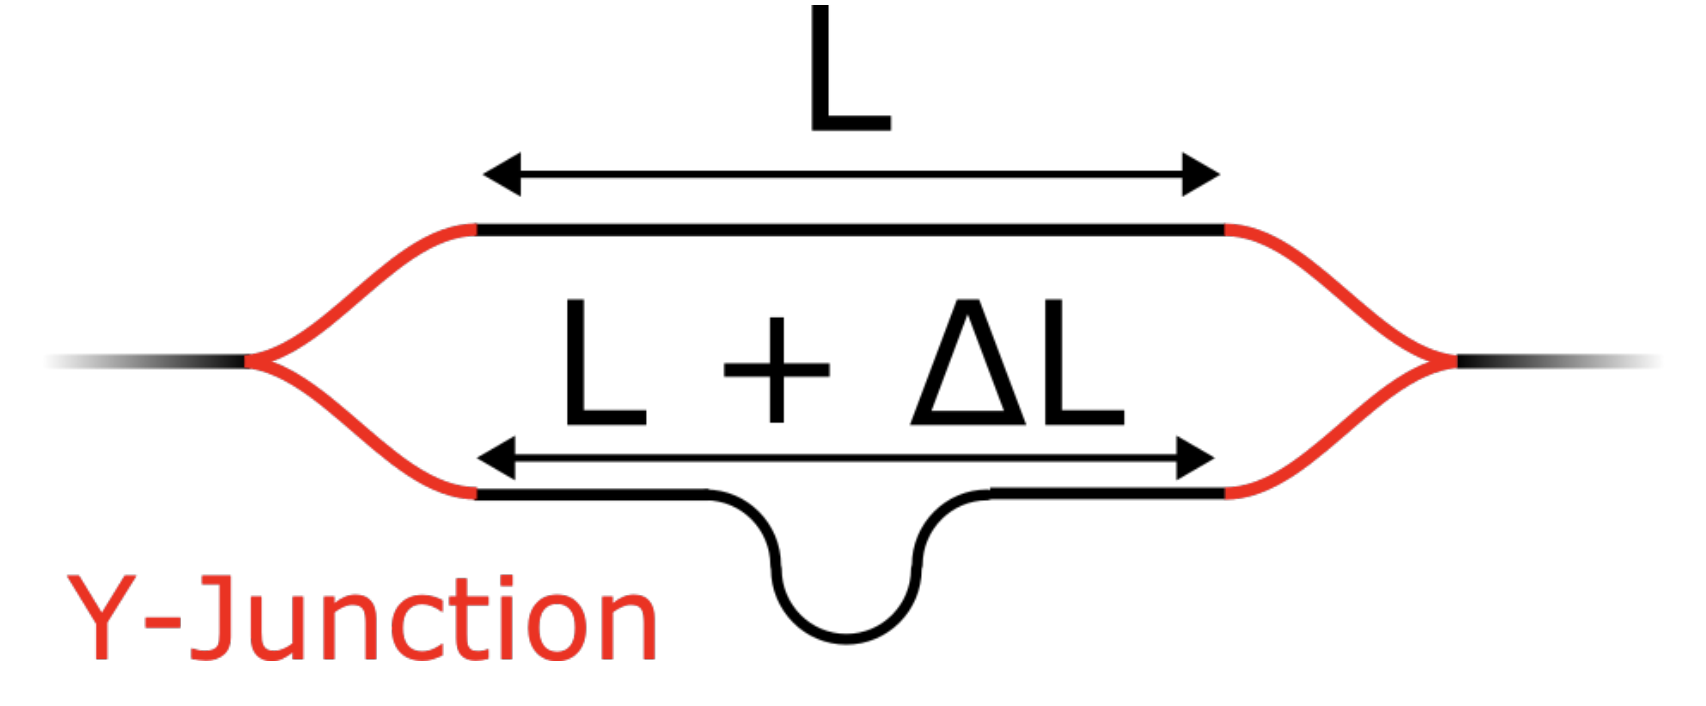

For an input field $E_{\rm in}$, we have 
\begin{equation*}
    E_{\rm out} = \frac{E_{\rm in} e^{i\beta L}}{2} \Big[1 + e^{i\beta \Delta L}\Big]
\end{equation*}
and thus the intensity $I_{\rm out} = |E_{\rm in}|^2 \cos^2(\beta \Delta L / 2)$. Here $\beta = 2\pi n_{\rm eff} / \lambda_0$ is the propagation constant. Setting $I_{\rm in} = |E_{\rm in}|^2$, we can compute the transmission spectrum $T = I_{\rm out} / I_{\rm in} = \cos^2(\beta \Delta L / 2) = \big[1 + \cos(\beta \Delta L)\big]/2$. 

In [211]:
""" Set wavelength range """
λ_min = 1450*nm; λ_max = 1650*nm; λ_range = np.linspace(λ_min, λ_max, 20001)

""" Set up parameters """
λ0 = 1525*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 10.485*μm #18.515*μm # MZI Wavelength Asymmetry

It turns out the effective index depends on wavelength. We can perform a first-order Taylor expansion $n_{\rm eff}(\lambda) = n_{\rm eff}(\lambda_0) + \frac{dn_{\rm eff}}{d\lambda}\big[\lambda-\lambda_0\big]$. In order to solve for the group velocity, we use $n_g = n_{\rm eff} - \frac{dn_{\rm eff}}{d\lambda}\lambda_0$ where $n_g, n_{\rm eff}$ are taken at $\lambda_0$. We then calculate $\beta(\lambda) = 2\pi n_{\rm eff}(\lambda) / \lambda$ for each wavelength $\lambda$.

Text(0.5, 1.0, 'Transmission: Log Scale')

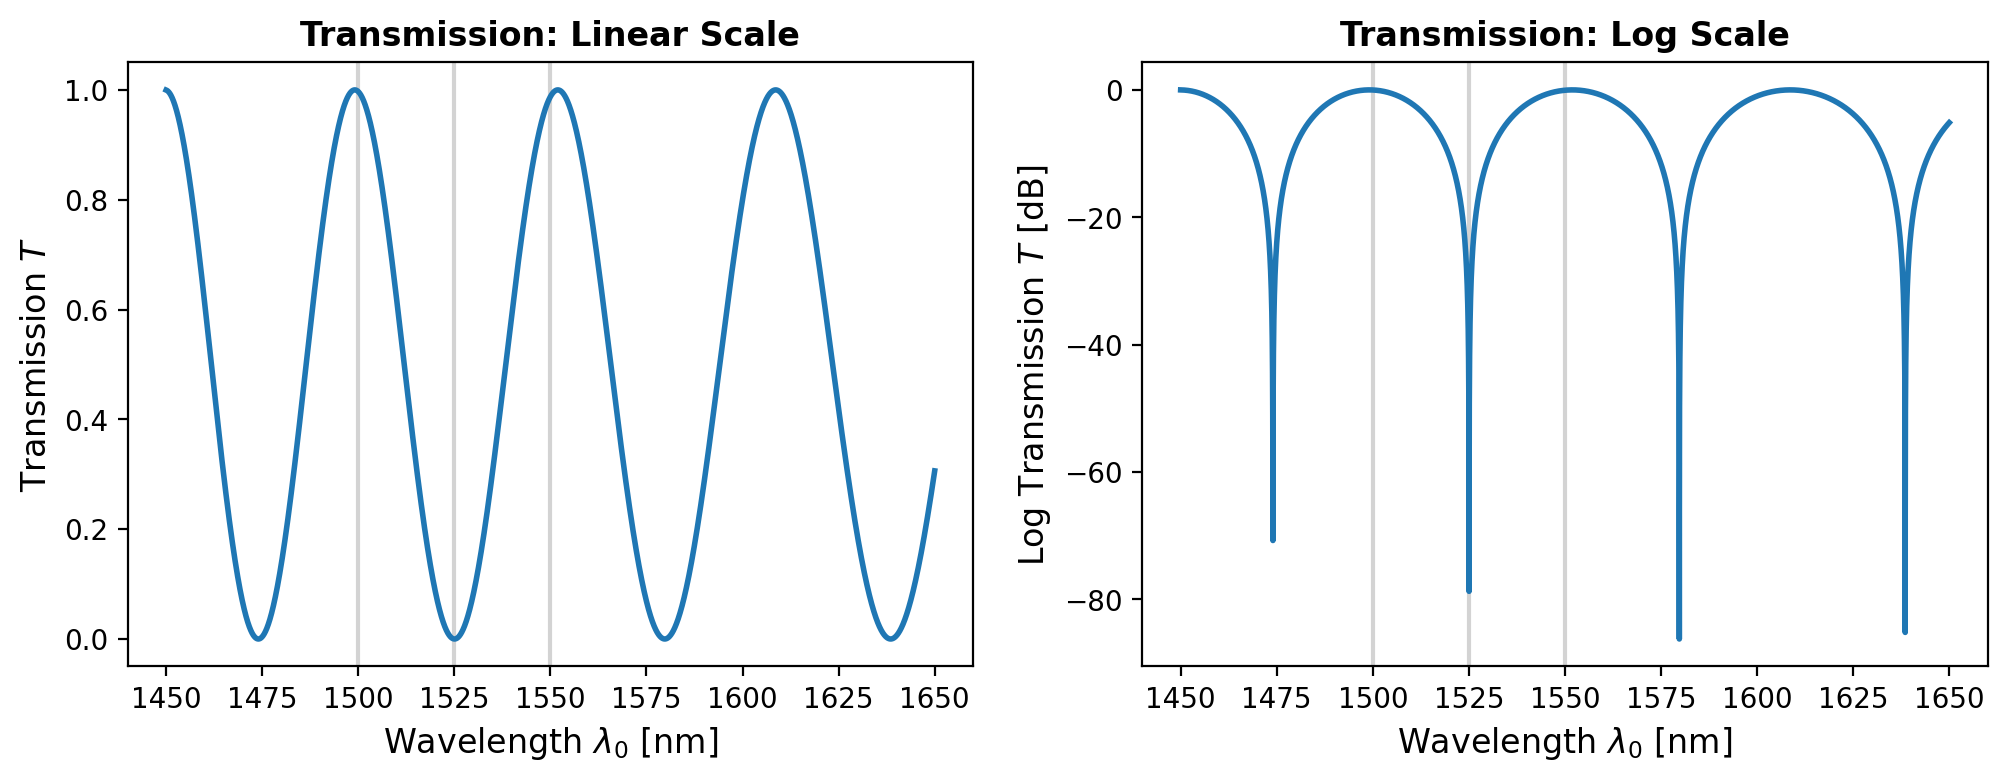

In [212]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range

""" Calculate Spectrum and Plot"""
T_linear = (1 + np.cos(β_range * ΔL)) / 2
T_log = 10*np.log10(T_linear)


fig, axs = plt.subplots(1, 2, dpi=200, figsize=(12, 4))

axs[0].axvline(1525, c='lightgrey')
axs[1].axvline(1525, c='lightgrey')
axs[0].axvline(1550, c='lightgrey')
axs[1].axvline(1550, c='lightgrey')
axs[0].axvline(1500, c='lightgrey')
axs[1].axvline(1500, c='lightgrey')
axs[0].plot(λ_range, T_linear, linewidth=2)
axs[1].plot(λ_range, T_log, linewidth=2)

axs[0].set_xlabel(r"Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission: Log Scale", fontweight="bold")

In [167]:
λ0**2 / (13.*μm * n_g)

63.55820105820106

## 2. Adding Losses to Improve Extinction Ratio

In [213]:
""" Set wavelength range """
λ_min = 1450*nm; λ_max = 1650*nm; λ_range = np.linspace(λ_min, λ_max, 20001)

""" Set up parameters """
λ0 = 1525*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 10.485*μm #18.515*μm # MZI Wavelength Asymmetry
α = 5e-6

Text(0.5, 1.0, 'Transmission with Loss: Log Scale')

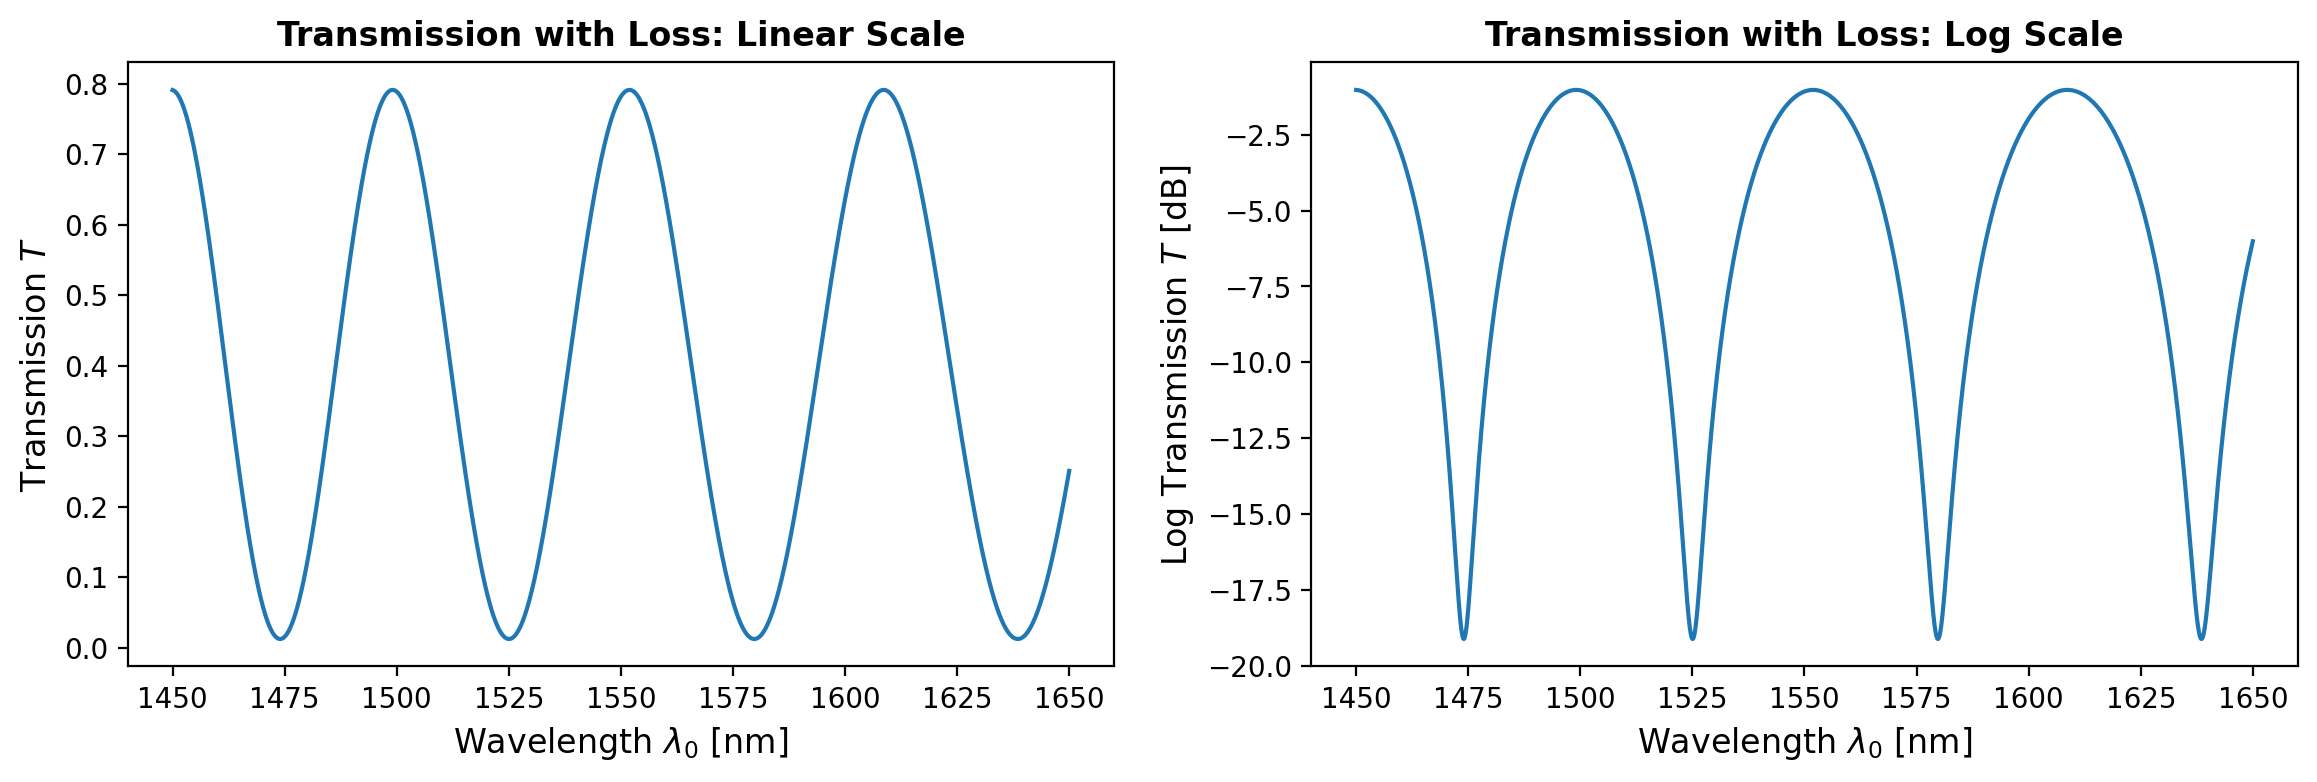

In [217]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range


""" Set up Normalized Electric Fields """
E1 = np.exp(-α * L / 2) * np.exp(1j * β_range * L) / np.sqrt(2)
E2 = np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)


E_out = (E1 + E2) / np.sqrt(2)

T_linear = np.abs(E_out)**2
T_log = 10*np.log10(T_linear)


fig, axs = plt.subplots(1, 2, dpi=200, figsize=(14, 4))

axs[0].plot(λ_range, T_linear)
axs[1].plot(λ_range, T_log)

axs[0].set_xlabel(r"Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission with Loss: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission with Loss: Log Scale", fontweight="bold")

## 3. MZI + Directional Coupler
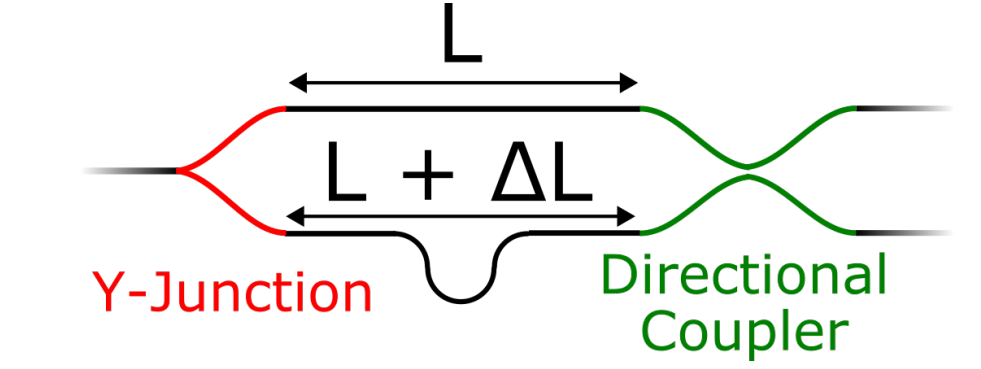

For a coupling ratio 50:50, set `T = 0.5` below. For a coupling ratio 60:40, use `T = 0.6`.

In [295]:
""" Set wavelength range """
λ_min = 1450*nm; λ_max = 1650*nm; λ_range = np.linspace(λ_min, λ_max, 20001)

""" Set up parameters """
λ0 = 1525*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 11.278*μm #18.515*μm # MZI Wavelength Asymmetry
α_dB_per_cm = 0.2
α = α_dB_per_cm * (μm / cm) / 4.34

""" Directional Coupler """
T = 0.5; t = np.sqrt(T); κ = np.sqrt(1 - T)

Text(0.5, 1.0, 'Transmission: Log Scale')

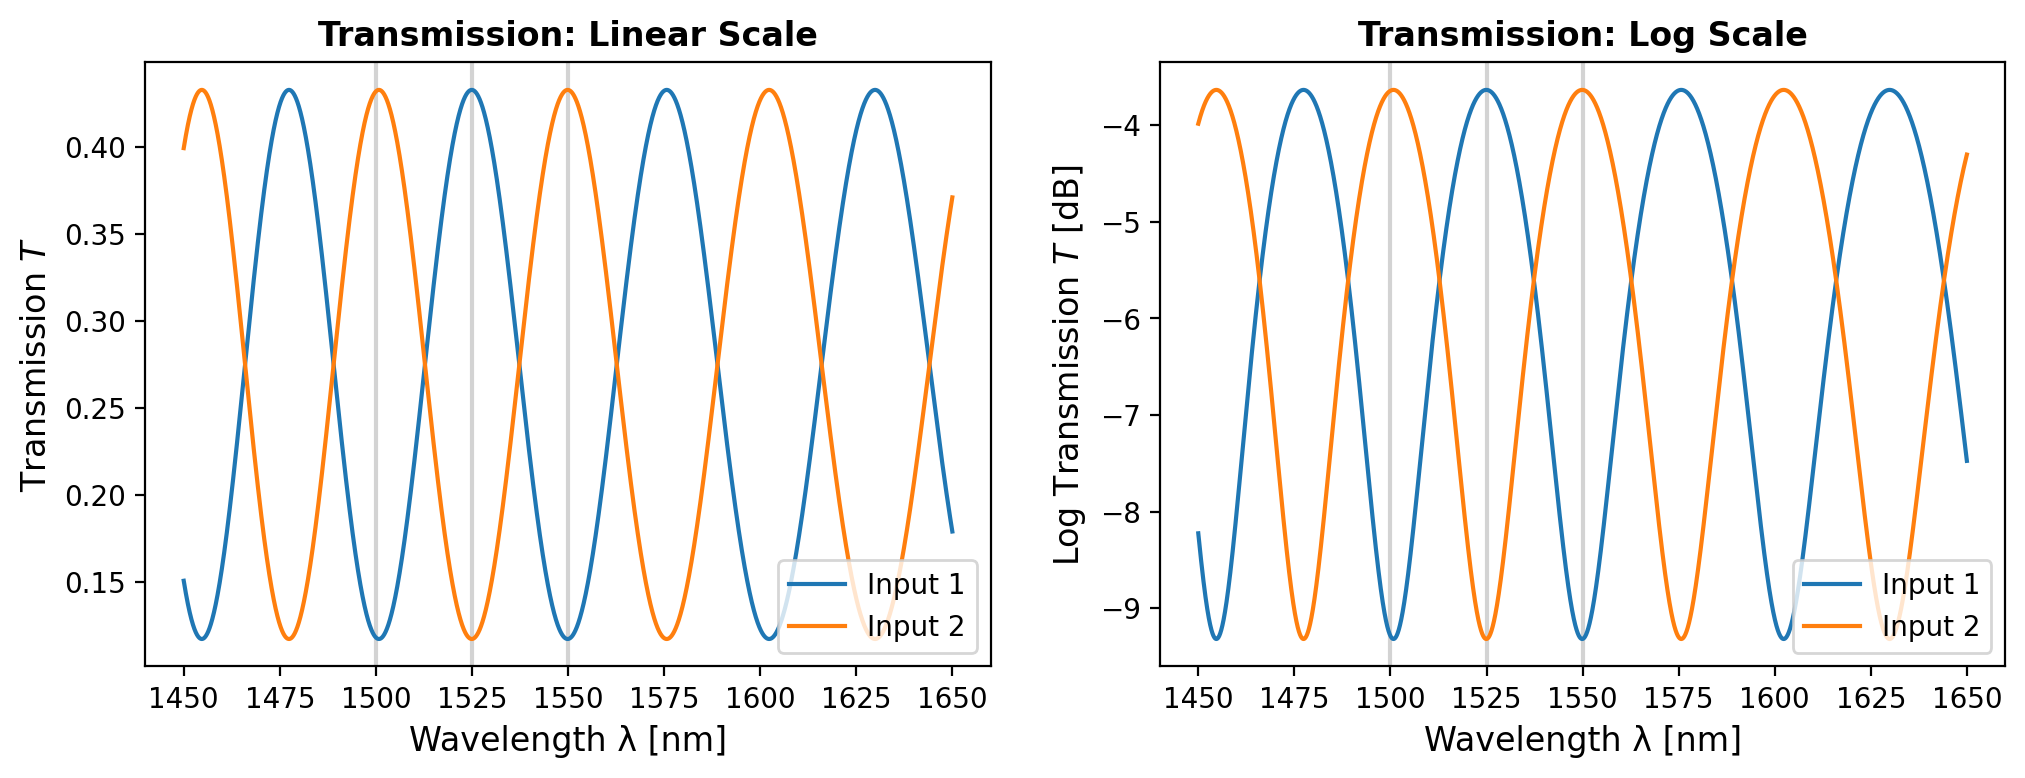

In [277]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range


""" Set up Normalized Electric Fields """

# E-Field Amplitudes before Directional Coupler
E1_mid = np.exp(-α * L / 2) * np.exp(1j * β_range * L) / np.sqrt(2)
E2_mid = np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)


# E-Field Amplitudes after Directional Coupler
E1_out = t * E1_mid + 1j * κ * E2_mid
E2_out = t * E2_mid + 1j * κ * E1_mid


""" Calculate Transmission Spectrum [dB] and Plot"""
T1_out = np.abs(E1_out)**2
T2_out = np.abs(E2_out)**2


T1_out_log = 10*np.log10(T1_out)
T2_out_log = 10*np.log10(T2_out)



""" Calculate Spectrum and Plot"""
fig, axs = plt.subplots(1, 2, dpi=200, figsize=(12, 4))

axs[0].axvline(1525, c='lightgrey')
axs[1].axvline(1525, c='lightgrey')
axs[0].axvline(1550, c='lightgrey')
axs[1].axvline(1550, c='lightgrey')
axs[0].axvline(1500, c='lightgrey')
axs[1].axvline(1500, c='lightgrey')


axs[0].plot(λ_range, T1_out, label="Input 1")
axs[0].plot(λ_range, T2_out, label="Input 2")
axs[1].plot(λ_range, T1_out_log, label="Input 1")
axs[1].plot(λ_range, T2_out_log, label="Input 2")

axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

axs[0].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission: Log Scale", fontweight="bold")

## 4. MZI Fab Tolerance Sweeps

In [543]:
def MZI_response(T, α_dB_per_cm, plot = True, ax = None):
    """
    Packaging up the previous code! 
    """
    """ Set wavelength range """
    λ_min = 1450*nm; λ_max = 1650*nm; λ_range = np.linspace(λ_min, λ_max, 20001)

    """ Set up parameters """
    λ0 = 1525*nm # Device wavelength λ₀
    n_eff = 2.4 # Effective index at λ₀
    n_g = 4.2 # Group index at λ₀
    L = 100*μm # MZI Waveguide Length
    ΔL = 11.278*μm #18.515*μm # MZI Wavelength Asymmetry
    α = α_dB_per_cm * (μm / cm) / 4.34

    """ Directional Coupler """
    t = np.sqrt(T); κ = np.sqrt(1 - T)
    
    """ Propagation Constant """
    slope = (n_eff - n_g) / λ0
    n_eff_range = n_eff + slope * (λ_range - λ0)
    β_range = 2 * π * n_eff_range / λ_range


    """ Set up Normalized Electric Fields """

    # E-Field Amplitudes before Directional Coupler
    E1_mid = np.exp(-α * L / 2) * np.exp(1j * β_range * L) / np.sqrt(2)
    E2_mid = np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)


    # E-Field Amplitudes after Directional Coupler
    E1_out = t * E1_mid + 1j * κ * E2_mid
    E2_out = t * E2_mid + 1j * κ * E1_mid


    """ Calculate Transmission Spectrum [dB] and Plot"""
    T1_out = np.abs(E1_out)**2
    T2_out = np.abs(E2_out)**2


    T1_out_log = 10*np.log10(T1_out)
    T2_out_log = 10*np.log10(T2_out)


    if plot:
        if ax is not None:
            ax = ax
        else:
            fig, ax = plt.subplots(1, 1, dpi=200, figsize=(6, 4))

        ax.axvline(1525, c='lightgrey', linestyle='--')
        ax.axvline(1550, c='lightgrey', linestyle='--')
        ax.axvline(1500, c='lightgrey', linestyle='--')

        ax.plot(λ_range, T1_out_log, label="Port 1: Pump")
        ax.plot(λ_range, T2_out_log, label="Port 2: Signal/Idler")
        ax.legend(loc='lower right', framealpha=1)

        ax.set_xlabel("Wavelength λ (nm)", fontsize=12);
        ax.set_ylabel(r"Transmission $T$ (dB)", fontsize=12);
        
        print(np.max(T2_out_log) - T2_out_log[7495])
        return ax
    
    # Return insertion loss
    return np.max(T2_out_log) - T2_out_log[7495]

103.93170490355448
39.99912950010367
33.97592318105949


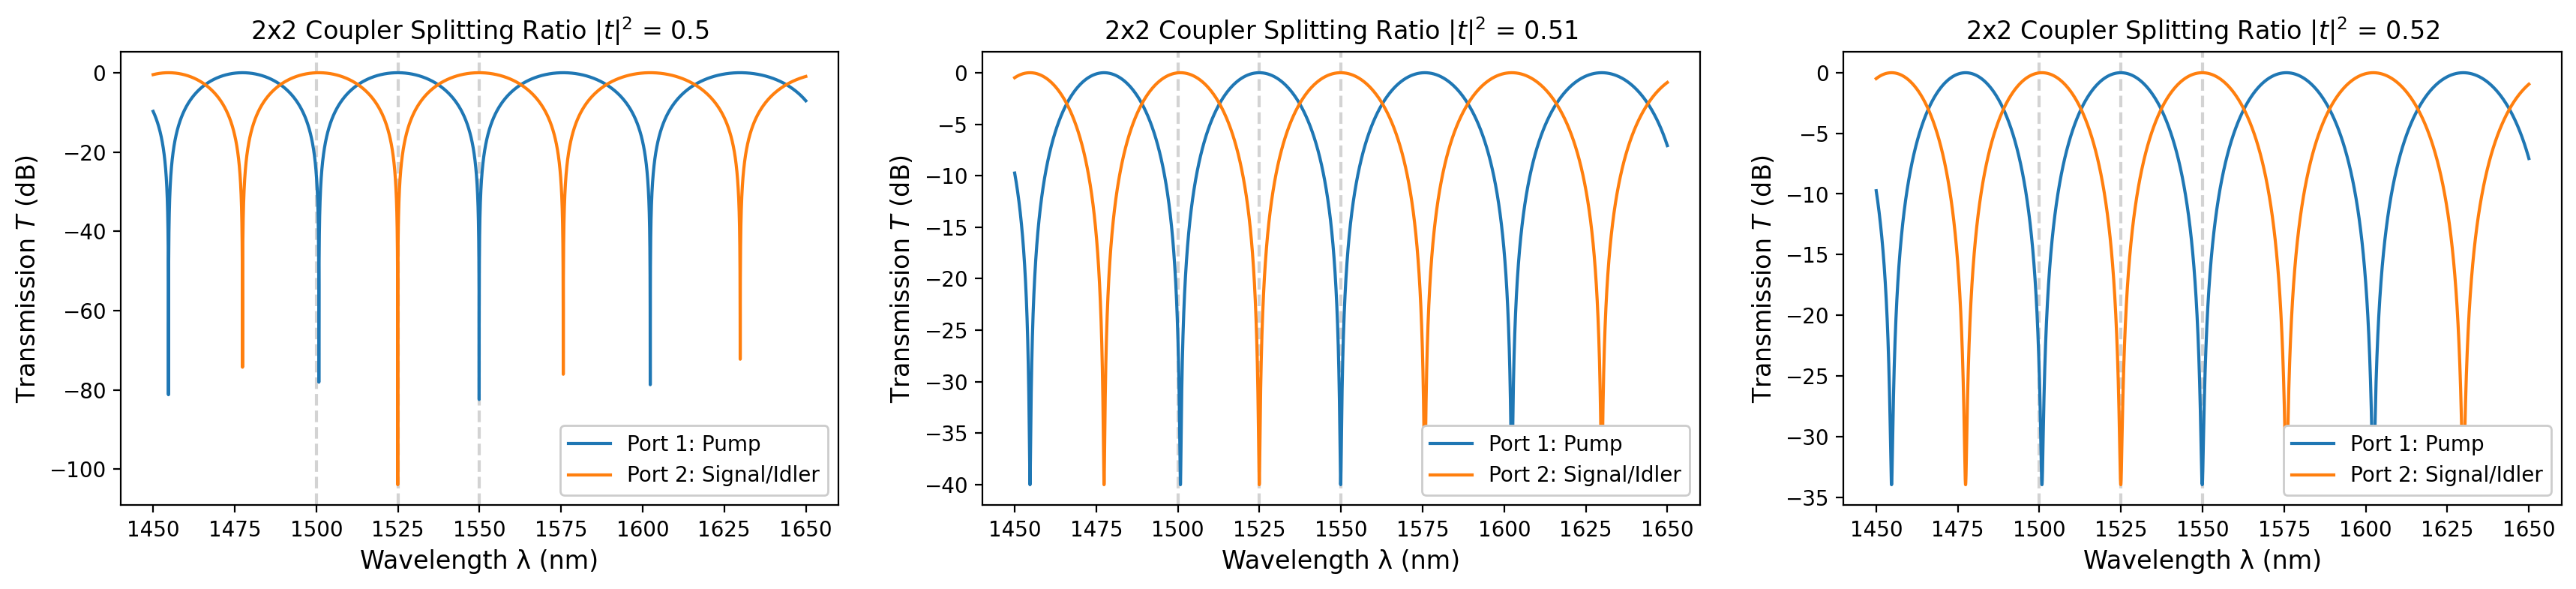

In [544]:
fig, axs = plt.subplots(1, 3, dpi=200, figsize=(21, 4))

for i, t2 in enumerate([0.5, 0.51, 0.52]):
    axs[i] = MZI_response(t2, 0, True, axs[i]);
    axs[i].set_title(fr"2x2 Coupler Splitting Ratio $|t|^2$ = {t2}")

In [383]:
Ts = np.linspace(0.47, 0.53, 501)
αs = np.linspace(0, 0.3, 31)
ILs_2D = []

for T in Ts:
    ILs = []
    for α in αs:
        ILs.append(MZI_response(T, α, plot = False))
    
    ILs_2D.append(ILs)
    
ILs_2D = np.array(ILs_2D)

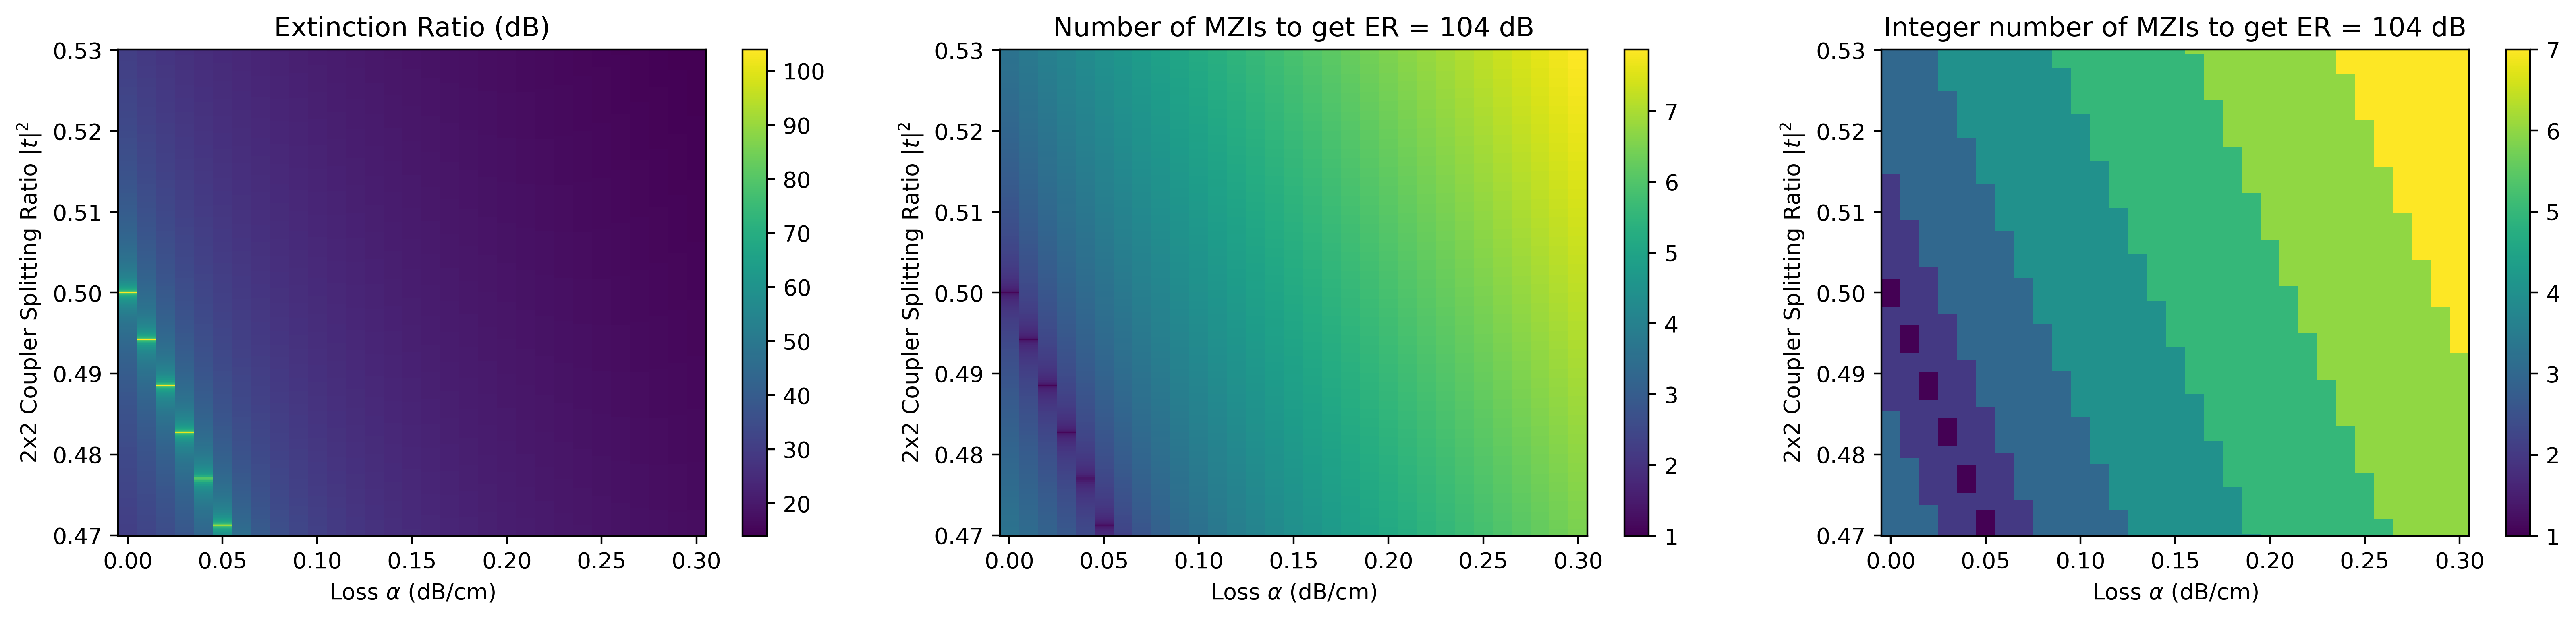

In [545]:
fig, axs = plt.subplots(1, 3, dpi=400, figsize = (20, 4))

for ax in axs:
    ax.set_xlabel(r"Loss $\alpha$ (dB/cm)")
    ax.set_ylabel(r"2x2 Coupler Splitting Ratio $|t|^2$")

a = axs[0].pcolormesh(αs, Ts, ILs_2D)
axs[0].set_title("Extinction Ratio (dB)")
plt.colorbar(a, ax=axs[0])
b = axs[1].pcolormesh(αs, Ts, (110 / ILs_2D), vmin=1)
axs[1].set_title("Number of MZIs to get ER = 104 dB")
plt.colorbar(b, ax=axs[1])
c = axs[2].pcolormesh(αs, Ts, (110 // ILs_2D), vmin=1)
axs[2].set_title("Integer number of MZIs to get ER = 104 dB")
plt.colorbar(c, ax=axs[2])

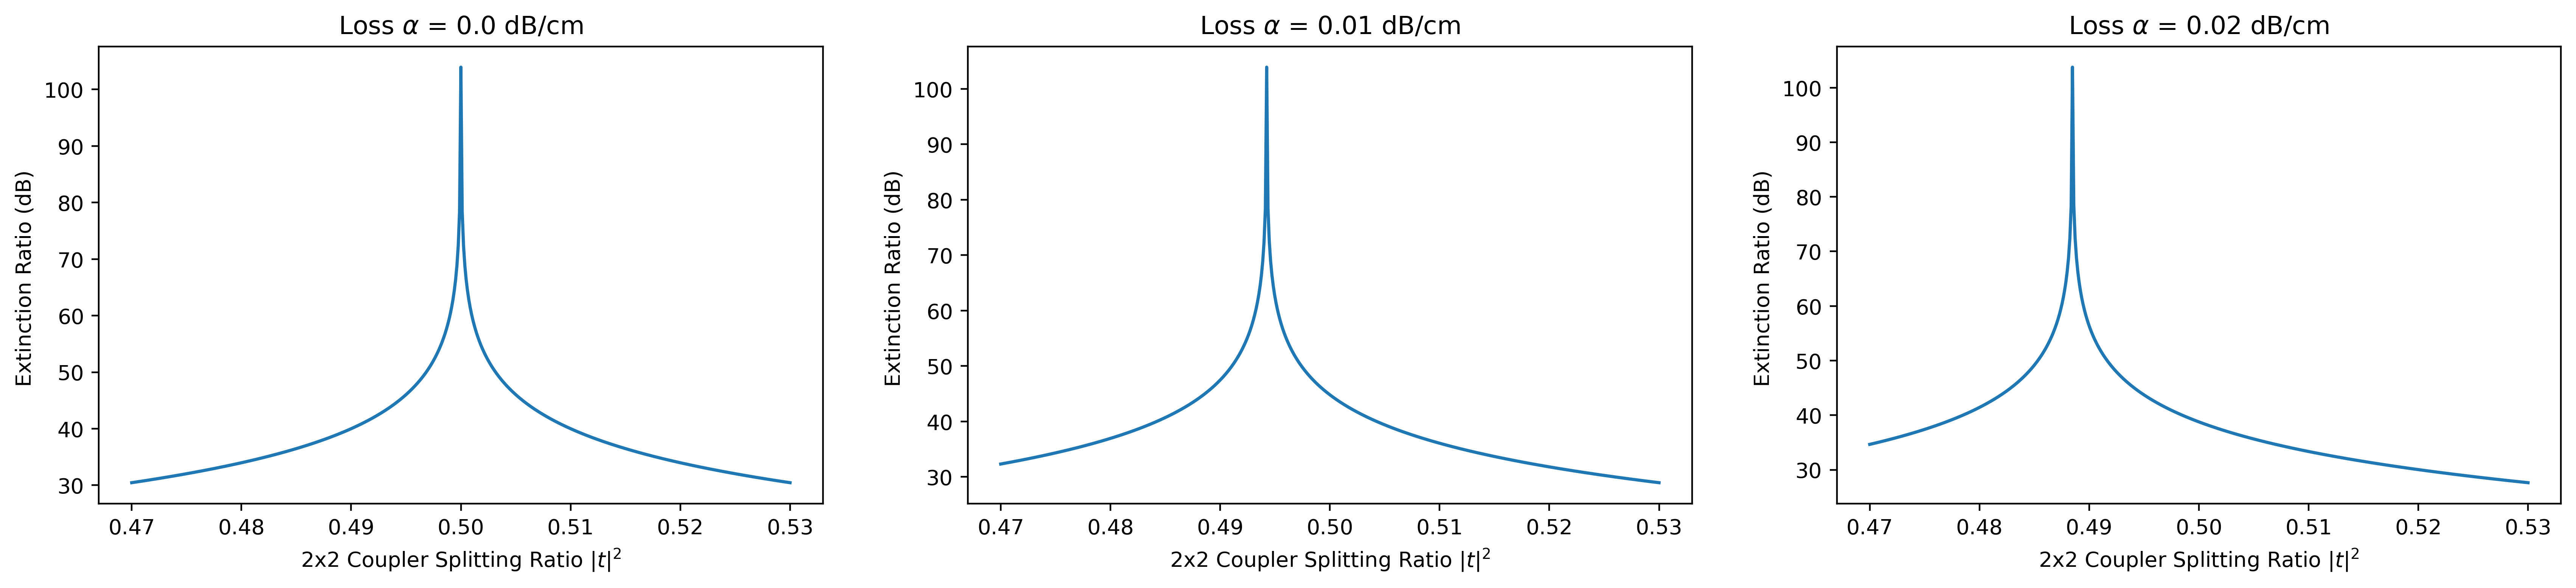

In [546]:
fig, axs = plt.subplots(1, 3, dpi=400, figsize = (21, 4))

for i, ax in enumerate(axs):
    ax.set_ylabel(r"Extinction Ratio (dB) ")
    ax.set_xlabel(r"2x2 Coupler Splitting Ratio $|t|^2$")
    
    ax.plot(Ts, ILs_2D[:, i])  
    ax.set_title(fr"Loss $\alpha$ = {αs[i]} dB/cm")